In [26]:
# Movie Rating Prediction 🎬
# CODSOFT - Data Science Internship (Task 2)


In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [28]:
df = pd.read_csv("IMDb Movies India.csv", encoding='latin-1')
df.head()


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [29]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [30]:
df = df.dropna(subset=['Rating'])

# Year: extract 4-digit year and convert to numeric
df['Year'] = df['Year'].astype(str).str.extract(r'(\d{4})')
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

# Duration cleaning (ensure string before .str operations)
df['Duration'] = df['Duration'].astype(str).str.replace(' min', '', regex=False)
df['Duration'] = pd.to_numeric(df['Duration'], errors='coerce')

# Votes cleaning (ensure string before .str operations)
df['Votes'] = df['Votes'].astype(str).str.replace(',', '', regex=False)
df['Votes'] = pd.to_numeric(df['Votes'], errors='coerce')

# Fill missing values
df['Duration'].fillna(df['Duration'].median(), inplace=True)
df['Votes'].fillna(df['Votes'].median(), inplace=True)
df['Genre'].fillna('Unknown', inplace=True)
df['Director'].fillna('Unknown', inplace=True)
df['Year'].fillna(df['Year'].median(), inplace=True)


C:\Users\Vansh Babbar\AppData\Local\Temp\ipykernel_4844\2242928944.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Duration'].fillna(df['Duration'].median(), inplace=True)
C:\Users\Vansh Babbar\AppData\Local\Temp\ipykernel_4844\2242928944.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always b

In [31]:
df.groupby('Year')['Rating'].mean().sort_values(ascending=False).head()


Year
1948    7.073684
1950    7.061290
1940    6.954545
1952    6.848148
1953    6.820690
Name: Rating, dtype: float64

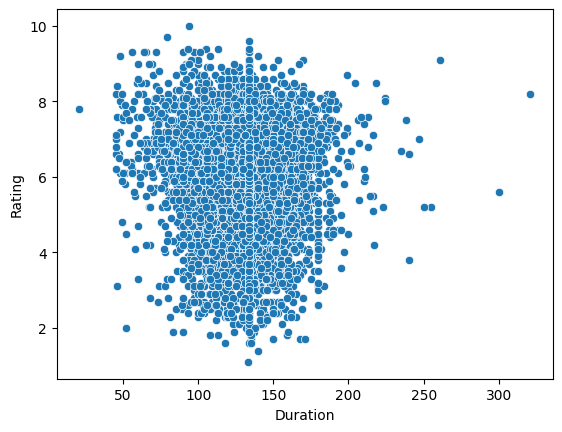

In [32]:
sns.scatterplot(x='Duration', y='Rating', data=df)
plt.show()


In [33]:
df[['Name','Rating']].sort_values(by='Rating', ascending=False).head(10)


,Name,Rating
8339,Love Qubool Hai,10.0
5410,Half Songs,9.7
2563,Breed,9.6
5077,Gho Gho Rani,9.4
14222,The Reluctant Crime,9.4
6852,June,9.4
11704,Ram-Path,9.4
9105,Meher,9.3
5125,God of gods,9.3
11843,Refl3ct,9.3


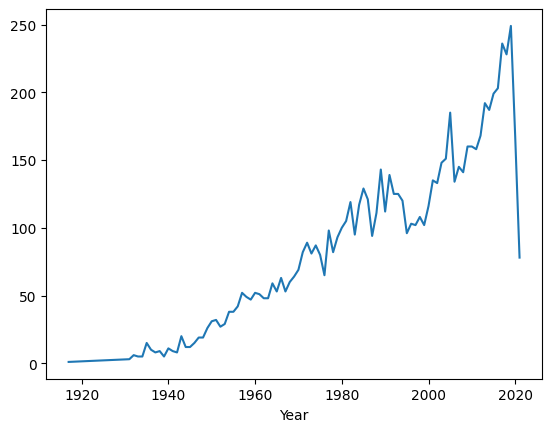

In [34]:
df['Year'].value_counts().sort_index().plot(kind='line')
plt.show()


In [35]:
df[['Name','Votes','Rating']].sort_values(by='Votes', ascending=False).head(10)


,Name,Votes,Rating
8219,Life of Pi,591417,7.9
75,3 Idiots,357889,8.4
8233,Lion,220526,8.0
4848,Gandhi,220118,8.0
14038,The Darjeeling Limited,185127,7.2
8228,Like Stars on Earth,175810,8.4
10882,PK,168150,8.1
3410,Dangal,165074,8.4
11463,Radhe,162455,1.8
3829,Dil Bechara,117377,6.6


In [36]:
df['Director'].value_counts().head(10)


Director
Mahesh Bhatt            47
David Dhawan            43
Hrishikesh Mukherjee    42
Shakti Samanta          39
Kanti Shah              38
Rama Rao Tatineni       34
Ram Gopal Varma         34
Basu Chatterjee         34
Vikram Bhatt            33
Shibu Mitra             33
Name: count, dtype: int64

In [37]:
le = LabelEncoder()
df['Genre_enc'] = le.fit_transform(df['Genre'])
df['Director_enc'] = le.fit_transform(df['Director'])

X = df[['Year', 'Duration', 'Votes', 'Genre_enc', 'Director_enc']]
y = df['Rating']


In [38]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [39]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

print("Linear Regression R2:", r2_score(y_test, lr_pred))


Linear Regression R2: 0.08950952671593515


In [40]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

print("Random Forest R2:", r2_score(y_test, rf_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, rf_pred)))


Random Forest R2: 0.32920023177657076
RMSE: 1.1167426424368008


In [41]:
# Conclusion
# - Votes strongly influence movie ratings
# - Duration has weak correlation with rating
# - Random Forest performed better than Linear Regression
# - Model can reasonably predict movie ratings
